In [1]:
### Imports and Auxiliary Functions

import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from math import pi

pc = const.pc.cgs.value # 1 parsec in cgs
au = const.au.cgs.value # 1 AU in cgs
c = const.c.cgs.value # speed of light in cgs

R_0 = 1 * au

beta = 0.9

def retY(t, R_0 = 100 * au):
    return(c * t / R_0)

def f(x, y, theta):
    return(y - x * ((1 / beta) * np.sqrt(x) - np.cos(theta)))

def fprime(x, theta):
    return(-(1.5/beta) * np.sqrt(x) + np.cos(theta))

def NR(guess, steps, epsilon, y, theta): # Newton-Raphson Method
    step_count = 0
    while np.abs(f(guess, y, theta)) > epsilon and step_count <= steps:
        guess = guess - np.divide(f(guess, y, theta), fprime(guess, theta))
        step_count += 1
    return guess

In [2]:
time = 10
theta = np.linspace(0, 2 * pi, 500)
locus = []

for angle in theta:
        R_soln = NR(0.5, 1000, 1e-6, retY(time), angle)
        locus.append(R_soln)
locus = np.reshape(np.array(locus), (np.size(time), np.size(theta)))

In [3]:
x = R_0 * locus * np.cos(theta)
y = R_0 * locus * np.sin(theta)

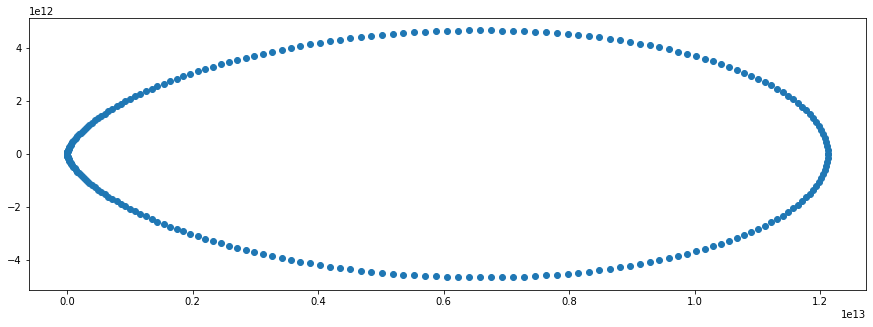

In [4]:
fig = plt.figure()
fig.set_size_inches(15., 5)
plt.scatter(x, y)